In [1]:
import numpy as np
import sacc

In [2]:
sb = sacc.Sacc.load_fits('../../TXPipe/data/kids/outputs/gammat_bright_stars.sacc')
sd = sacc.Sacc.load_fits('../../TXPipe/data/kids/outputs/gammat_dim_stars.sacc')

/opt/conda/lib/python3.10/site-packages/sacc/data_types.py:304: UserWarning: Unknown data_type value galaxyStar_shearDensity_xi_t. If possible use a pre-defined type, or add to the list.
  warnings.warn(f"Unknown data_type value {data_type}. "


In [3]:
sb.get_data_types()

['galaxyStar_shearDensity_xi_t']

In [4]:
sb_thetaxi = sb.get_theta_xi('galaxyStar_shearDensity_xi_t','source2d','bright_stars')

In [5]:
sd.get_tracer_combinations('galaxyStar_shearDensity_xi_t')

[('source2d', 'dim_stars')]

In [6]:
sb.get_tag('theta')

[2.757336532419459,
 3.3158265553932194,
 3.9874900191440505,
 4.795045654558688,
 5.766126349201166,
 6.9336931802694615,
 8.337923667465242,
 10.026462635708123,
 12.05697868691403,
 14.498487103726626,
 17.436427678885956,
 20.967131288731895,
 25.213502433881846,
 30.317641902974664,
 36.457757836178374,
 43.835757374158035,
 52.719990669010826,
 63.38782953137029,
 76.22789047201864,
 91.65916102139]

In [7]:
sd_thetaxi = sd.get_theta_xi('galaxyStar_shearDensity_xi_t','source2d','dim_stars')

In [8]:
sb_thetaxi

(array([ 2.75733653,  3.31582656,  3.98749002,  4.79504565,  5.76612635,
         6.93369318,  8.33792367, 10.02646264, 12.05697869, 14.4984871 ,
        17.43642768, 20.96713129, 25.21350243, 30.3176419 , 36.45775784,
        43.83575737, 52.71999067, 63.38782953, 76.22789047, 91.65916102]),
 array([ 7.39822729e-04, -1.42380485e-04, -1.96411815e-04, -2.80704642e-04,
         4.17208200e-04,  5.52374417e-04, -3.31127091e-05,  3.99131345e-04,
         5.37222474e-04,  8.34745245e-05, -1.27944126e-04, -2.70659018e-04,
        -1.54098449e-04, -1.99243276e-05, -8.89234467e-05, -1.15706902e-04,
         7.27571493e-05,  1.64372685e-04,  4.07475697e-07, -1.82399543e-04]))

In [9]:
sb_err = sb.get_tag('error')

In [10]:
sb_err=np.array(sb_err)

In [11]:
sb_err

array([0.00073358, 0.00057505, 0.00056782, 0.00055654, 0.00049986,
       0.00050816, 0.00040335, 0.00036265, 0.00032691, 0.00029146,
       0.00029593, 0.00030873, 0.00026641, 0.00026739, 0.00024769,
       0.00021741, 0.00023825, 0.00019542, 0.0001673 , 0.00013114])

In [12]:
sd_err = np.array(sd.get_tag('error'))

In [13]:
import matplotlib
font = {}
font = {'family': 'Serif',
        'size'   : '12'}

matplotlib.rc('font', **font)

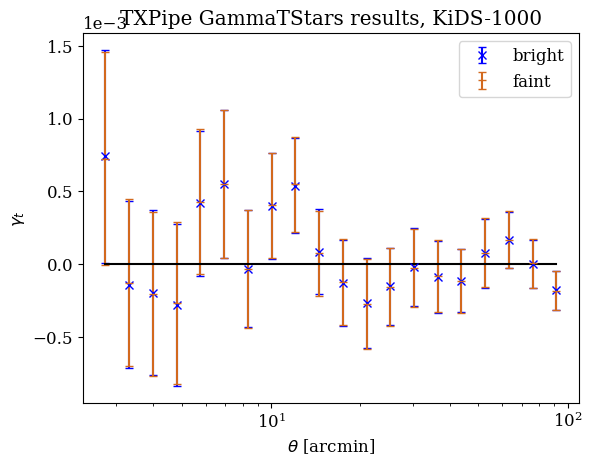

In [14]:
import matplotlib.pyplot as plt
plt.errorbar(sb_thetaxi[0],sb_thetaxi[1],sb_err,marker='x',color='blue',linestyle='None',label='bright',capsize=3)
plt.errorbar(sd_thetaxi[0],sd_thetaxi[1],sd_err,marker='_',color='chocolate',linestyle='None',label='faint',capsize=3)
plt.plot(sd_thetaxi[0],np.zeros(len(sd_thetaxi[0])),color='black')
plt.xscale('log')
plt.legend()
plt.ticklabel_format(style='sci', axis='y', scilimits=(-2e-4,2e-4))
#plt.ylim([-2e-4,2e-4])
#plt.xlim([0.000,2.1e2])
plt.xlabel(r'$\theta$ [arcmin]')
plt.ylabel(r'$\gamma_t$')
plt.title('TXPipe GammaTStars results, KiDS-1000')
plt.savefig('../plots/KiDS/kids_gammaTstars.pdf')